<a href="https://colab.research.google.com/github/ArchitDhodi/Team-Hotel_Booking_Analysis-EDA-by-Archit/blob/main/M3C1L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Why Anomalies Matter in Retail Data 🛒💼**

###**Methods for Detecting Anomalies in Retail Data 📊🔍**

Detecting anomalies in retail data 📊🔍 is a multifaceted task that relies on a combination of statistical methods, machine learning algorithms, and domain expertise. Each of these methods offers a unique approach to identifying irregularities or unusual patterns in data, and they play a critical role in improving decision-making, security, and operational efficiency in the retail sector.

1) **Descriptive Statistics📈📉**:


In [ ]:
import numpy as np
# Sample retail sales data
sales_data = [100, 150, 120, 80, 200, 95, 110, 130, 160, 90]
# Calculate mean and standard deviation
mean_sales = np.mean(sales_data)
std_deviation = np.std(sales_data)
# Set a threshold for flagging anomalies (e.g., 2 standard deviations from the mean)
threshold_upper = mean_sales + 2 * std_deviation #95%
threshold_lower = mean_sales - 2 * std_deviation #95%
# Identify anomalies
anomalies_upper = [data_point for data_point in sales_data if data_point > threshold_upper]
anomalies_lower = [data_point for data_point in sales_data if data_point < threshold_lower]
print("Retail Sales Data:")
print("Sales Data:", sales_data)
print("Mean Sales:", mean_sales)
print("Standard Deviation:", std_deviation)
print("Anomalies Upper(2 standard deviations from the mean):", anomalies_upper)
print("Anomalies Lower(2 standard deviations from the mean):", anomalies_lower)

Retail Sales Data:
Sales Data: [100, 150, 120, 80, 200, 95, 110, 130, 160, 90]
Mean Sales: 123.5
Standard Deviation: 35.358874416474286
Anomalies Upper(2 standard deviations from the mean): [200]
Anomalies Lower(2 standard deviations from the mean): []


2) **Time-Series Analysis ⏳📈:**

Time-series analysis is particularly relevant in the retail industry, where data often involves a temporal component. Methods like Exponential Smoothing or Seasonal Decomposition of Time Series (STL) allow retailers to analyze historical sales data and identify anomalies in patterns or trends over time. For example, detecting a sudden spike in online sales during a holiday season compared to historical sales data can provide valuable insights for marketing and inventory management.

**Example:**

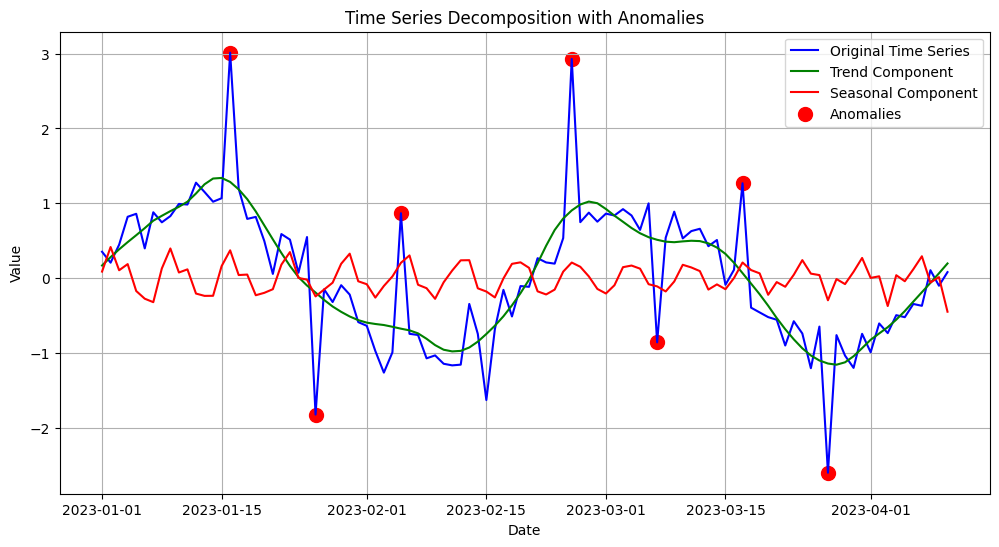

Detected Anomalies:
DatetimeIndex(['2023-01-16', '2023-01-26', '2023-02-05', '2023-02-25',
               '2023-03-07', '2023-03-17', '2023-03-27'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from scipy import stats
# Generate synthetic time series data with irregular anomalies
np.random.seed(0)
n = 100
time_index = pd.date_range(start='2023-01-01', periods=n, freq='D')
data = np.sin(np.linspace(0, 4 * np.pi, n)) + np.random.normal(0, 0.2, n)
# Introduce irregular anomalies
anomaly_indices = [15, 25, 35, 45, 55, 65, 75, 85]
data[anomaly_indices] += np.array([2.0, -1.5, 1.8, -1.0, 2.2, -1.7, 1.5, -2.0])  # Irregular anomaly values
ts = pd.Series(data, index=time_index)
# Perform Seasonal Decomposition of Time Series (STL)
stl = STL(ts, seasonal=13)  # seasonal period of 13 for demonstration
result = stl.fit()
# Extract the trend, seasonal, and residual components
trend, seasonal, residual = result.trend, result.seasonal, result.resid
# Calculate z-scores for the residual component to identify anomalies
z_scores = np.abs(stats.zscore(residual))
# Set a threshold for anomaly detection (adjust as needed)
threshold = 2.0
# Detect anomalies based on the z-scores
anomaly_indices = np.where(z_scores > threshold)[0]
anomaly_dates = time_index[anomaly_indices]
# Visualize the time series with anomalies
plt.figure(figsize=(12, 6))
plt.plot(time_index, ts, label='Original Time Series', color='b')
plt.plot(time_index, trend, label='Trend Component', color='g')
plt.plot(time_index, seasonal, label='Seasonal Component', color='r')
plt.scatter(anomaly_dates, ts[anomaly_indices], color='red', marker='o', label='Anomalies', s=100)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Decomposition with Anomalies')
plt.legend()
plt.grid(True)
plt.show()
# Print the dates of detected anomalies
print("Detected Anomalies:")
print(anomaly_dates)

3) Machine Learning 🤖🔍:

Machine learning 🤖🔍 has emerged as a powerful tool for anomaly detection in various retail data streams. Supervised and unsupervised techniques like Isolation Forests, One-Class SVMs, or Autoencoders can be trained to recognize anomalies in transaction data, customer behavior, or inventory levels. For instance, using an Isolation Forest algorithm can identify unusual purchasing patterns that may indicate fraudulent activity, such as a large number of high-value transactions within a short period.

**Example:**

In [ ]:
from sklearn.ensemble import IsolationForest
# Sample retail sales data
sales_data = [100, 150, 120, 80, 200, 95, 110, 130, 160, 90]
# Create a numpy array from the data
sales_array = np.array(sales_data).reshape(-1, 1)
# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1)  # Adjust the contamination parameter as needed
# Fit the model
iso_forest.fit(sales_array)
# Predict anomalies
anomaly_predictions = iso_forest.predict(sales_array)
# Get the indices of anomalies
anomaly_indices = np.where(anomaly_predictions == -1)
# Identify anomalies
anomalies = [sales_data[i] for i in anomaly_indices[0]]
print("Anomalies:", anomalies)

Anomalies: [200]


4) Rule-Based Systems 🚨📝:

Rule-based systems offer a straightforward way for retailers to define rules or thresholds that trigger alerts when certain conditions are met. These rules can be tailored to specific business needs. For example, setting a rule to flag any transaction above a certain monetary value as suspicious or triggering an alert when there is a sudden increase in returns. Rule-based systems provide a proactive approach to anomaly detection and enable rapid response to potential issues.

5) Predictive Analytics 📈🔮:

Predictive analytics 📈🔮 leverages models to forecast future behavior and compare it to actual data. Deviations from the predicted values can highlight anomalies. For instance, a predictive model might forecast the demand for a specific product in a store. If the actual sales significantly deviate from the forecasted values, it can signal an anomaly, prompting retailers to investigate the root causes, such as supply chain disruptions or changing customer preferences.

[Click Here for Amazon Dataset](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset)

**Exploratory Data Analysis (EDA):**

Load the data into a pandas DataFrame and perform basic EDA to understand its structure and characteristics:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Load the data into a pandas DataFrame
df = pd.read_csv('amazon.csv')

In [ ]:
#Exploring top 5 rows
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
#Checking the datatypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
#Basic Data Preprocessing:
#Converting discounted_price, actual_price, discount_percentage,	rating and rating_count features into numerical from object type
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(int)
df['rating'] = df['rating'].str.replace('|', '0').astype(float)
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

<ipython-input-7-dfbb80ca1f63>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['rating'] = df['rating'].str.replace('|', '0').astype(float)


After getting the idea about the dataset. Let's check the distribution and outliers present in the dataset using boxplots and histogram.

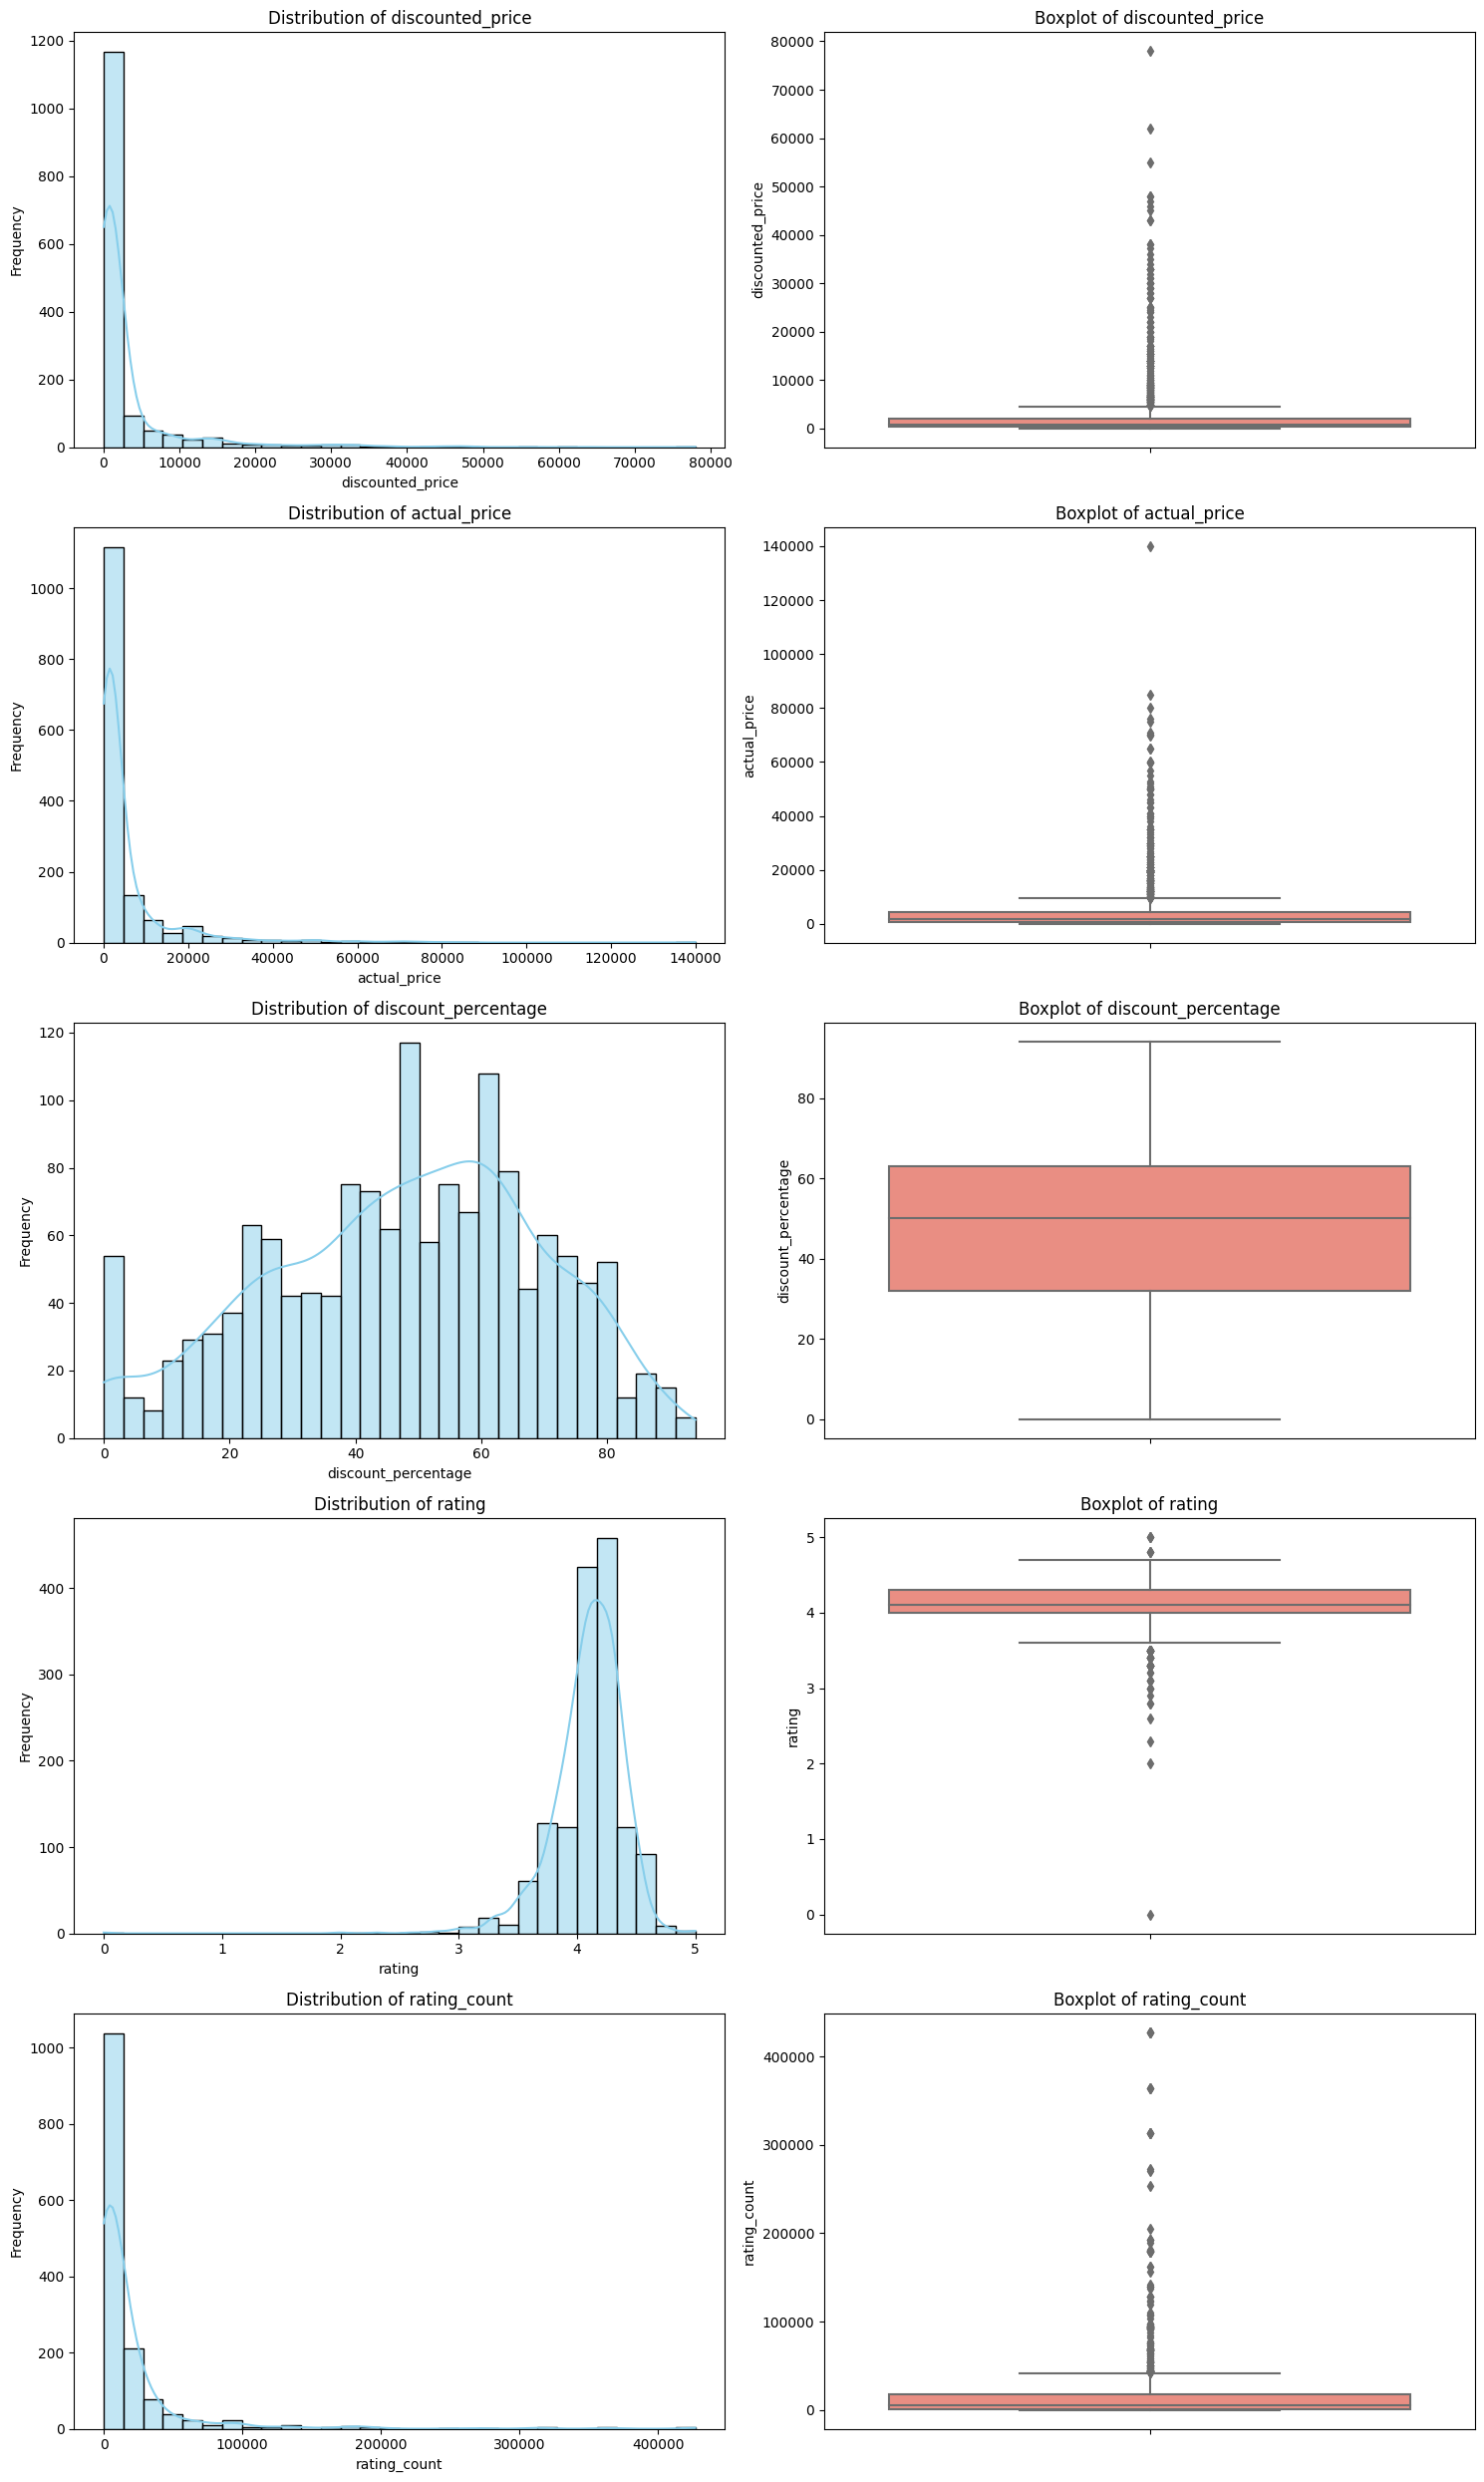

In [ ]:
# Define the list of numerical features
numerical_features = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
# Set up subplots for distribution plots
plt.figure(figsize=(15, 5 * len(numerical_features)))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 2, 2 * i - 1)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.subplot(len(numerical_features), 2, 2 * i)
    sns.boxplot(data=df, y=feature, color='salmon')
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

From the above visualizations we can observe about the presence of outliers and skewed distribution in all numerical variables except for discount_percentage.

###**Z-Score Method:**

The Z-Score, also known as the Standard Score or Normal Score, is a statistical measure that quantifies how far away a data point is from the mean (average) of a dataset, measured in terms of standard deviations. It's a way to standardize data and identify outliers or anomalies.
* **Set a Threshold:** Decide on a threshold value (usually, a Z-Score threshold of 2 or 3 is used). Data points with Z-Scores beyond this threshold are considered anomalies.
* **Identify Anomalies:** Any data point with an absolute Z-Score greater than the threshold is identified as an anomaly.
The Z-Score method is useful when dealing with normally distributed data and assumes that anomalies deviate significantly from the mean.


![picture](https://media.geeksforgeeks.org/wp-content/uploads/20210525140711/empiricalrule-660x388.png)

Let's implement the Zscore method for all the features individually and flag all possible anamolies as per the common threshold 3. After flagging the Anomalies let's visualize each data points using scatter plot.

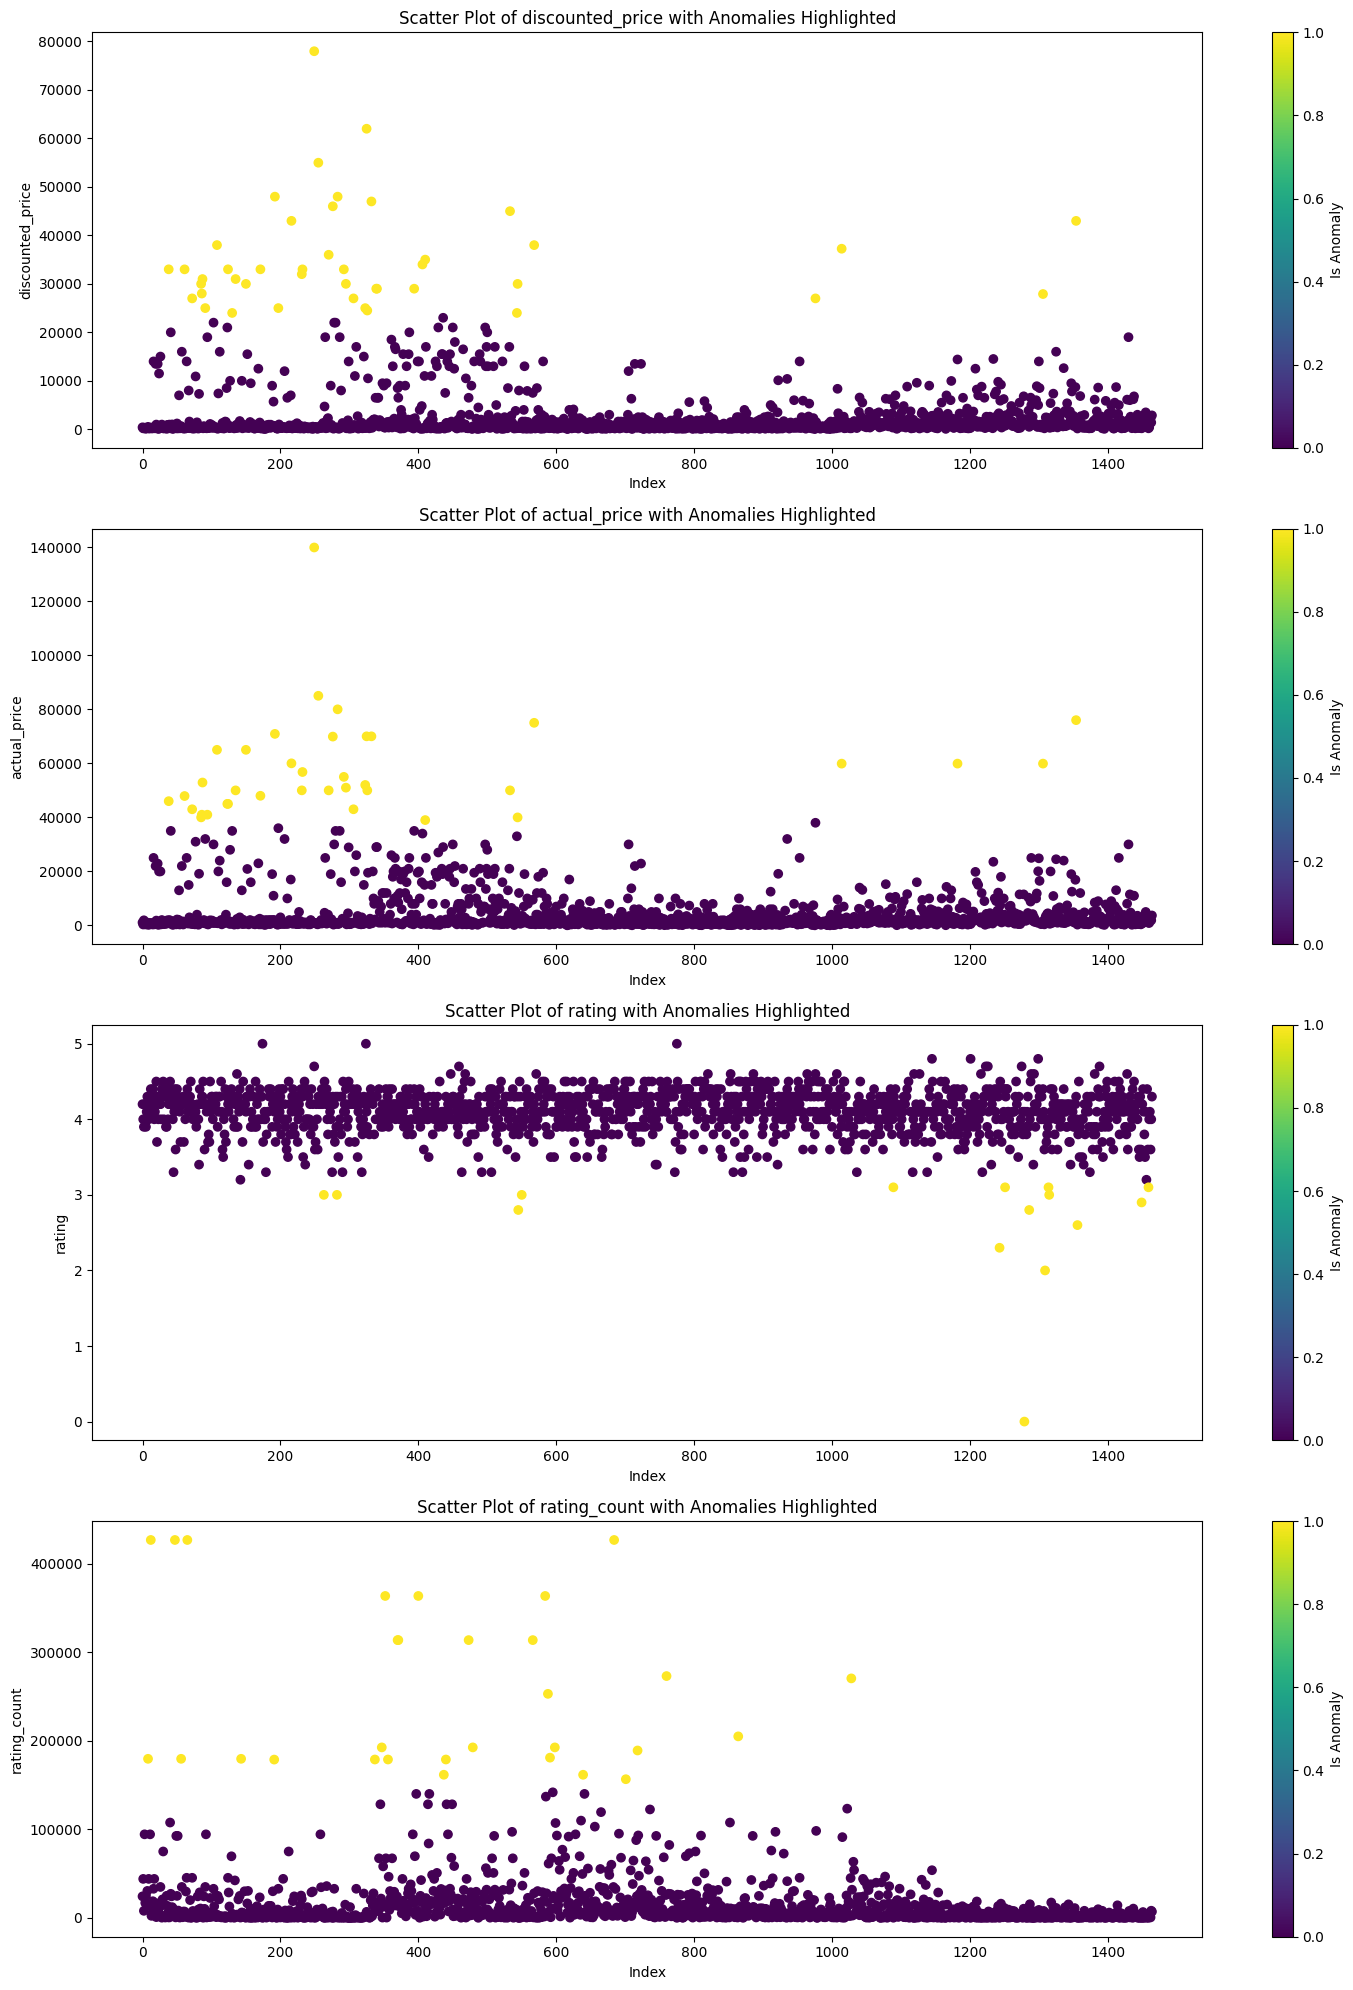

In [ ]:
# Define the features to analyze
features_to_analyze = ['discounted_price', 'actual_price', 'rating', 'rating_count']
# Create a new DataFrame to store Z-Scores and anomalies
df_anomalies = df.copy()
# Set the Z-Score threshold for anomaly detection (you can adjust this threshold)
z_score_threshold = 3  # Commonly used threshold: 3 standard deviations
# Create a scatter plot for each feature with anomalies highlighted
plt.figure(figsize=(15, 5 * len(features_to_analyze)))
for i, feature_to_analyze in enumerate(features_to_analyze, 1):
    # Calculate Z-Scores for the current feature
    z_scores = np.abs((df[feature_to_analyze] - df[feature_to_analyze].mean()) / df[feature_to_analyze].std())
    # Flag anomalies based on the Z-Score threshold
    df_anomalies[f'{feature_to_analyze}_ZScore'] = z_scores
    df_anomalies[f'{feature_to_analyze}_Anomaly'] = z_scores > z_score_threshold
    # Create a scatter plot with anomalies highlighted for the current feature
    plt.subplot(len(features_to_analyze), 1, i)
    plt.scatter(df_anomalies.index, df_anomalies[feature_to_analyze], c=df_anomalies[f'{feature_to_analyze}_Anomaly'], cmap='viridis')
    plt.title(f'Scatter Plot of {feature_to_analyze} with Anomalies Highlighted')
    plt.xlabel('Index')
    plt.ylabel(feature_to_analyze)
    plt.colorbar(label='Is Anomaly')

plt.tight_layout()
plt.show()


In [ ]:
df_anomalies.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,img_link,product_link,discounted_price_ZScore,discounted_price_Anomaly,actual_price_ZScore,actual_price_Anomaly,rating_ZScore,rating_Anomaly,rating_count_ZScore,rating_count_Anomaly
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,0.392597,False,0.399638,False,0.341959,False,0.139717,False
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,0.421397,False,0.468604,False,0.301961,False,0.601079,False
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,0.421397,False,0.326073,False,0.623921,False,0.242494,False
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,0.402677,False,0.436420,False,0.341959,False,1.779195,False
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,0.427877,False,0.464007,False,0.341959,False,0.032524,False


In [ ]:
#Flagged anomalies in each features
print("Anomalies in Discounted_price:",df_anomalies[df_anomalies['discounted_price_Anomaly']].shape[0])
print("Anomalies in Actual_price:",df_anomalies[df_anomalies['actual_price_Anomaly']].shape[0])
print("Anomalies in Rating:",df_anomalies[df_anomalies['rating_Anomaly']].shape[0])
print("Anomalies in Rating_count:",df_anomalies[df_anomalies['rating_count_Anomaly']].shape[0])

Anomalies in Discounted_price: 43
Anomalies in Actual_price: 37
Anomalies in Rating: 15
Anomalies in Rating_count: 30


####Observations after flagging anomalies using the Z-Score for each numerical feature

1. **discounted_price**:

* **Anomalies**: Prices above 23,999 are highlighted as anomalies.
* **Interpretation**: Products with prices above 23,999 are potentially premium products like Televisions, Smartphones, Traditional Laptops, etc.
* **Overall**: 43 anomalies observed.

2. **actual_price**:

* **Anomalies**: Prices above 38,999 are highlighted as anomalies.
* **Interpretation**: Similar to discounted prices, products with prices above 38,999 are considered premium compared to others.
* **Overall**: 37 anomalies observed.

3. **Rating**:

* **Anomalies**: Ratings below 3.1 are considered anomalies.
* **Interpretation**: Products with ratings below 3.1 are potentially unpopular or have received low customer satisfaction.
* **Overall**: 15 anomalies observed.

4. **rating_count**:

* **Anomalies**: Products with rating counts of 156,638 and above are considered anomalies.
* **Interpretation**: Products with extremely high rating counts may have either received a large number of fake ratings or are exceptionally popular.
* **Overall**: 30 anomalies observed.


These interpretations provide valuable insights into the anomalies detected in each feature and their potential implications. For instance, anomalies in 'discounted_price' and 'actual_price' suggest the presence of premium products, while anomalies in 'Rating' and 'rating_count' indicate potential issues with product popularity or authenticity of ratings. These findings can be used to make informed decisions and take appropriate actions based on the anomalies detected.